In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay
import joblib
import pickle

In [2]:
df = pd.read_csv("Bank_Customers_Cleaned.csv")

In [3]:
df.head()

,id,age,experience,income,zip_code,family,cc_avg,education,mortgage,personal_loan,...,credit_card,age_bracket,income_group,cc_avg_group,education_level,mortgage_group,housing_to_income_group,total_customer_products,cc_to_income_group,income_per_family_member_group
0,1,25,1,49,91107.0,4,1.6,1,0,0,...,0,20-30,Low,Low,Undergrad,NaN,NaN,1,Moderate,Low
1,2,45,19,34,90089.0,3,1.5,1,0,0,...,0,41-50,Low,Low,Undergrad,NaN,NaN,1,High,Low
2,3,39,15,11,94720.0,1,1.0,1,0,0,...,0,31-40,Low,Low,Undergrad,NaN,NaN,0,Critical,Low
3,4,35,9,100,94112.0,1,2.7,2,0,0,...,0,31-40,Medium,Medium,Graduate,NaN,NaN,0,Moderate,High
4,5,35,8,45,91330.0,4,1.0,2,0,0,...,1,31-40,Low,Low,Graduate,NaN,NaN,1,Moderate,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5000 non-null   int64  
 1   age                             5000 non-null   int64  
 2   experience                      5000 non-null   int64  
 3   income                          5000 non-null   int64  
 4   zip_code                        4999 non-null   float64
 5   family                          5000 non-null   int64  
 6   cc_avg                          5000 non-null   float64
 7   education                       5000 non-null   int64  
 8   mortgage                        5000 non-null   int64  
 9   personal_loan                   5000 non-null   int64  
 10  securities_account              5000 non-null   int64  
 11  cd_account                      5000 non-null   int64  
 12  online_banking                  50

## Dropping Unnecessary Columns

In [5]:
cols_to_drop = ['id', 'zip_code', 'age_bracket', 'income_group', 'cc_avg_group', 'education_level', 'mortgage_group', 'housing_to_income_group', 'total_customer_products', 'cc_to_income_group',
                'income_per_family_member_group']
print(len(cols_to_drop))

11


In [6]:
df = df.drop(columns = cols_to_drop)

In [7]:
df.head()

,age,experience,income,family,cc_avg,education,mortgage,personal_loan,securities_account,cd_account,online_banking,credit_card
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   experience          5000 non-null   int64  
 2   income              5000 non-null   int64  
 3   family              5000 non-null   int64  
 4   cc_avg              5000 non-null   float64
 5   education           5000 non-null   int64  
 6   mortgage            5000 non-null   int64  
 7   personal_loan       5000 non-null   int64  
 8   securities_account  5000 non-null   int64  
 9   cd_account          5000 non-null   int64  
 10  online_banking      5000 non-null   int64  
 11  credit_card         5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


## Identifying any Null Values

In [9]:
df.isnull().sum()

age                   0
experience            0
income                0
family                0
cc_avg                0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online_banking        0
credit_card           0
dtype: int64

## Separating features (X) and target (y)

In [10]:
X = df.drop('personal_loan', axis = 1)
y = df['personal_loan']

## Handling Categorical variables

In [11]:
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Professional'}
X['education'] = X['education'].map(education_mapping)

family_mapping = {1: 'Size_1', 2: 'Size_2', 3: 'Size_3', 4: 'Size_4'}
X['family'] = X['family'].map(family_mapping)

X = pd.get_dummies(X, columns = ['education', 'family'], drop_first = True)

In [12]:
X.head()

,age,experience,income,cc_avg,mortgage,securities_account,cd_account,online_banking,credit_card,education_Professional,education_Undergrad,family_Size_2,family_Size_3,family_Size_4
0,25,1,49,1.6,0,1,0,0,0,False,True,False,False,True
1,45,19,34,1.5,0,1,0,0,0,False,True,False,True,False
2,39,15,11,1.0,0,0,0,0,0,False,True,False,False,False
3,35,9,100,2.7,0,0,0,0,0,False,False,False,False,False
4,35,8,45,1.0,0,0,0,0,1,False,False,False,False,True


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5000 non-null   int64  
 1   experience              5000 non-null   int64  
 2   income                  5000 non-null   int64  
 3   cc_avg                  5000 non-null   float64
 4   mortgage                5000 non-null   int64  
 5   securities_account      5000 non-null   int64  
 6   cd_account              5000 non-null   int64  
 7   online_banking          5000 non-null   int64  
 8   credit_card             5000 non-null   int64  
 9   education_Professional  5000 non-null   bool   
 10  education_Undergrad     5000 non-null   bool   
 11  family_Size_2           5000 non-null   bool   
 12  family_Size_3           5000 non-null   bool   
 13  family_Size_4           5000 non-null   bool   
dtypes: bool(5), float64(1), int64(8)
memory 

In [14]:
X = X.astype({col: 'int64' for col in X.select_dtypes('bool').columns})

In [15]:
X.head()

,age,experience,income,cc_avg,mortgage,securities_account,cd_account,online_banking,credit_card,education_Professional,education_Undergrad,family_Size_2,family_Size_3,family_Size_4
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0,1
1,45,19,34,1.5,0,1,0,0,0,0,1,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,0,1,0,0,0,0,1


## Splitting data into training and testing splits

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

## Scaling Numeric features (non boolean treated columns)

In [17]:
numeric_cols = ['age', 'experience', 'income', 'cc_avg', 'mortgage']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])

# Initial Model development

## Defining and Initializing Models

In [18]:
models = {
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state = 42),
    "Random Forest": RandomForestClassifier(random_state = 42),
    "Gradient Boosting": GradientBoostingClassifier(random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree": DecisionTreeClassifier(random_state = 42)
}
models_results = []

## Training, Predicting and Evaluating each Model

In [19]:
for name, model in models.items():
    print(f"Training {name}!")
    
    #Training each Model
    model.fit(X_train, y_train) 

    #Predicting results of each Model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    #Evaluating each Model performance
    report = classification_report(y_test, y_pred, output_dict = True)
    accuracy = report['accuracy']
    roc_auc = roc_auc_score(y_test, y_prob)

    #Storing evaluating results of each Model in a predefined list
    models_results.append({
        "Model": name,
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "F1-Score_0": report['0']['f1-score'],
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1-Score_1": report['1']['f1-score'],
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc
    })

Training Logistic Regression!
Training Random Forest!
Training Gradient Boosting!
Training KNN!
Training Decision Tree!


## Converting results to a DataFrame

In [20]:
models_results_df = pd.DataFrame(models_results)
models_results_df = models_results_df.sort_values(by = "F1-Score_1", ascending = False)

## Comparing Results

In [21]:
models_results_df

,Model,Precision_0,Recall_0,F1-Score_0,Precision_1,Recall_1,F1-Score_1,Accuracy,ROC-AUC
1,Random Forest,0.993385,0.996681,0.995030,0.967742,0.937500,0.952381,0.991,0.998479
2,Gradient Boosting,0.995541,0.987832,0.991671,0.893204,0.958333,0.924623,0.985,0.998387
4,Decision Tree,0.992161,0.980088,0.986088,0.831776,0.927083,0.876847,0.975,0.953586
0,Logistic Regression,0.963362,0.988938,0.975983,0.861111,0.645833,0.738095,0.956,0.966215
3,KNN,0.954497,0.997788,0.975663,0.963636,0.552083,0.701987,0.955,0.927948


# Model Redevelopment with Class Balancing

## Defining and Initializing Models

In [22]:
models_balanced = {
    "Logistic Regression": LogisticRegression(max_iter = 1000, random_state = 42, class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(random_state = 42, class_weight = 'balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "Decision Tree": DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
}

## Initializing SMOTE balancer

In [23]:
smote = SMOTE(random_state = 42)

## Training, Predicting and Evaluating each Rebalanced Model

In [24]:
models_balanced_results = []
for name, model in models.items():
    print(f"Training {name}!")
    
    #Training each Model
    if name in ["Gradient Boosting", "KNN"]:
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        model.fit(X_train_res, y_train_res)
    else:
        model.fit(X_train, y_train) 

    #Predicting results of each Model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    #Evaluating each Model performance
    report = classification_report(y_test, y_pred, output_dict = True)
    accuracy = report['accuracy']
    roc_auc = roc_auc_score(y_test, y_prob)

    #Storing evaluating results of each Model in a predefined list
    models_balanced_results.append({
        "Model": name,
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "F1-Score_0": report['0']['f1-score'],
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "F1-Score_1": report['1']['f1-score'],
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc
    })

Training Logistic Regression!
Training Random Forest!
Training Gradient Boosting!
Training KNN!
Training Decision Tree!


## Converting results to a DataFrame

In [25]:
models_balanced_results_df = pd.DataFrame(models_balanced_results)
models_balanced_results_df = models_balanced_results_df.sort_values(by = "F1-Score_1", ascending = False)

## Comparing Results

In [26]:
models_balanced_results_df

,Model,Precision_0,Recall_0,F1-Score_0,Precision_1,Recall_1,F1-Score_1,Accuracy,ROC-AUC
1,Random Forest,0.993385,0.996681,0.995030,0.967742,0.937500,0.952381,0.991,0.998479
2,Gradient Boosting,0.997740,0.976770,0.987144,0.817391,0.979167,0.890995,0.977,0.997269
4,Decision Tree,0.992161,0.980088,0.986088,0.831776,0.927083,0.876847,0.975,0.953586
3,KNN,0.982955,0.956858,0.969731,0.675000,0.843750,0.750000,0.946,0.970000
0,Logistic Regression,0.963362,0.988938,0.975983,0.861111,0.645833,0.738095,0.956,0.966215


# Hyperparameter Tuning of best performing Models

## Defining Models and their respective Parameter Grids

In [27]:
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state = 42, class_weight = 'balanced'),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state = 42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [3, 4, 5],
            "min_samples_split": [2, 5, 10],
            "learning_rate": [0.01, 0.05, 0.1],
            "subsample": [0.8, 1.0]
        }
    }
}

## Tuning

In [28]:
best_models_tuned = []
for name, cfg in param_grids.items():
    print(f"Tuning {name}!")

    X_train_res, y_train_rest = smote.fit_resample(X_train, y_train)
    
    search = RandomizedSearchCV(estimator = cfg["model"], param_distributions = cfg["params"], n_iter = 10, scoring = "f1", cv = 5, n_jobs = -1, random_state = 42, verbose = 1)
    search.fit(X_train_res, y_train_rest)
    best_model = search.best_estimator_
    best_params = search.best_params_

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    report = classification_report(y_test, y_pred, output_dict = True)
    roc_auc = roc_auc_score(y_test, y_prob)

    best_models_tuned.append({
        "Model": name,
        "Best Params": best_params,
        "F1-Score_1": report['1']['f1-score'],
        "ROC-AUC": roc_auc,
        "Accuracy": report['accuracy'],
        "Estimator": best_model
    })

Tuning Random Forest!
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuning Gradient Boosting!
Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Converting results to a DataFrame

In [29]:
best_models_tuned_df = pd.DataFrame(best_models_tuned)
best_models_tuned_df = best_models_tuned_df.sort_values(by = "F1-Score_1", ascending = False)

## Displaying results of Best Performing Models after Tuning

In [30]:
best_models_tuned_df

,Model,Best Params,F1-Score_1,ROC-AUC,Accuracy,Estimator
0,Random Forest,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.928571,0.996808,0.986,"(DecisionTreeClassifier(max_depth=20, max_feat..."
1,Gradient Boosting,"{'subsample': 1.0, 'n_estimators': 300, 'min_s...",0.866359,0.996635,0.971,([DecisionTreeRegressor(criterion='friedman_ms...


# Identifying the Best Performing Model

In [31]:
best_row = best_models_tuned_df.loc[best_models_tuned_df['F1-Score_1'].idxmax()]
best_model_name = best_row['Model']
best_model = best_row['Estimator']
print(f"Best Model: {best_model_name}")
print(best_model)

Best Model: Random Forest
RandomForestClassifier(class_weight='balanced', max_depth=20,
                       max_features='log2', min_samples_split=5,
                       random_state=42)


In [32]:
print("Model classes:", best_model.classes_)
print("Sample predicted probabilities on X_test:")
print(best_model.predict_proba(X_test)[:10])

Model classes: [0 1]
Sample predicted probabilities on X_test:
[[0.97785714 0.02214286]
 [0.00333333 0.99666667]
 [0.98       0.02      ]
 [1.         0.        ]
 [1.         0.        ]
 [0.99       0.01      ]
 [0.96666667 0.03333333]
 [0.99       0.01      ]
 [0.86541667 0.13458333]
 [0.94583333 0.05416667]]


## Cross Validating Results of Best Performing Model

In [33]:
f1_scorer = make_scorer(f1_score)
roc_scorer = make_scorer(roc_auc_score, needs_proba = True)

In [34]:
best_model_f1_scores = cross_val_score(best_model, X_train, y_train, cv = 5, scoring = f1_scorer)
best_model_roc_scores = cross_val_score(best_model, X_train, y_train, cv = 5, scoring = 'roc_auc')

print(f"Cross-Validation on F1-Scores on Loan Accepted = 1: {best_model_f1_scores}")
print(f"Mean F1-Score on Loan Accepted = 1: {np.mean(best_model_f1_scores):.3f} ± {np.std(best_model_f1_scores):.3f}\n")
print(f"Cross-Validation on ROC-AUC Scores: {best_model_roc_scores}")
print(f"Mean ROC-AUC Score: {np.mean(best_model_roc_scores):.3f} ± {np.std(best_model_roc_scores):.3f}")

Cross-Validation on F1-Scores on Loan Accepted = 1: [0.9261745  0.94594595 0.85714286 0.84353741 0.86842105]
Mean F1-Score on Loan Accepted = 1: 0.888 ± 0.040

Cross-Validation on ROC-AUC Scores: [0.99816444 0.99752115 0.99687449 0.98981516 0.9914318 ]
Mean ROC-AUC Score: 0.995 ± 0.003


## Feature Importance of the Best Performing Model

In [35]:
importances = best_model.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values('Importance', ascending = False)
feat_importance

,Feature,Importance
2,income,0.474994
3,cc_avg,0.195034
10,education_Undergrad,0.120294
4,mortgage,0.038639
6,cd_account,0.028377
0,age,0.028308
1,experience,0.027052
12,family_Size_3,0.019982
13,family_Size_4,0.017534
11,family_Size_2,0.014777


## Visualizing the importance of each feature

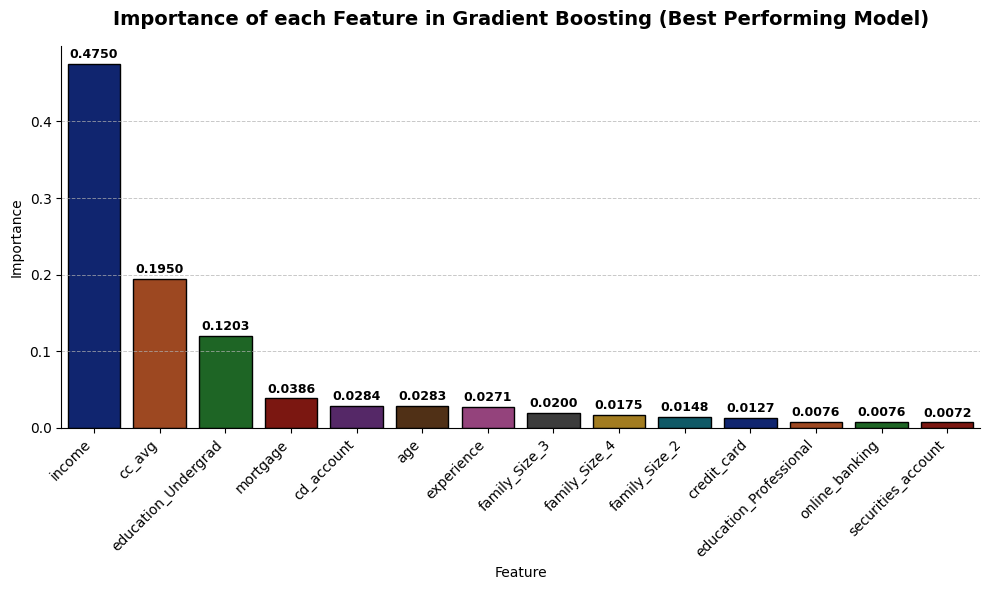

In [36]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = feat_importance, x = 'Feature', y = 'Importance', hue = 'Feature', palette = 'dark', edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.4f', label_type = 'edge', fontsize = 9, padding = 2, color = 'black', weight = 'bold')

ax.yaxis.grid(True, linestyle = '--', linewidth = 0.7, alpha = 0.7)
ax.xaxis.grid(False)

plt.title("Importance of each Feature in Gradient Boosting (Best Performing Model)", fontsize = 14, weight = 'bold', pad = 15)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation = 45, ha = 'right')
sns.despine()
plt.tight_layout()
plt.show()

## Confusion Matrix of the Best Performing Model

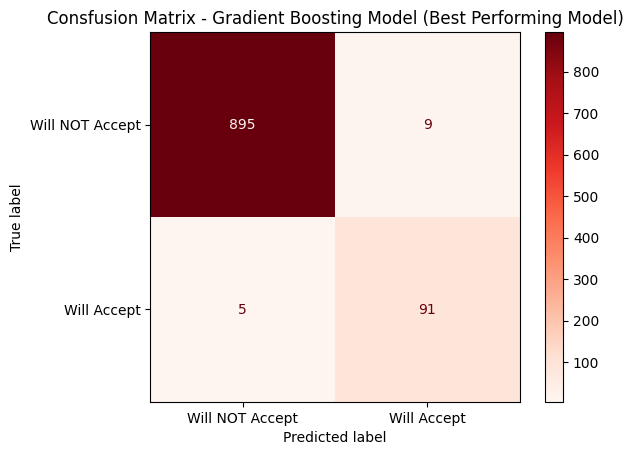

In [37]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap = plt.cm.Reds, display_labels = ["Will NOT Accept", "Will Accept"], values_format = '.0f')
plt.title("Consfusion Matrix - Gradient Boosting Model (Best Performing Model)")
plt.show()

## ROC Curve of the Best Performing Model

In [38]:
best_model_y_prob = best_model.predict_proba(X_test)[:, 1]
best_model_y_pred = best_model.predict(X_test)

ROC-AUC Score: 0.997


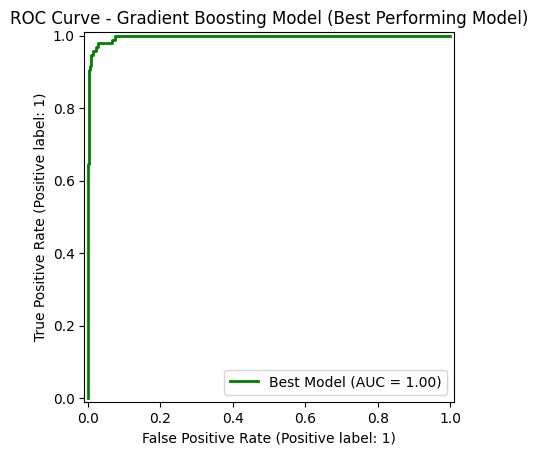

In [39]:
best_model_roc_auc = roc_auc_score(y_test, best_model_y_prob)
print(f"ROC-AUC Score: {best_model_roc_auc:.3f}")

RocCurveDisplay.from_predictions(y_test, best_model_y_prob, name = "Best Model", curve_kwargs = {"color": "green", "linewidth": 2})
plt.title("ROC Curve - Gradient Boosting Model (Best Performing Model)")
plt.show()

## Precision Precision Recall Curve of the Best Performing Model

Recall Score: 0.948


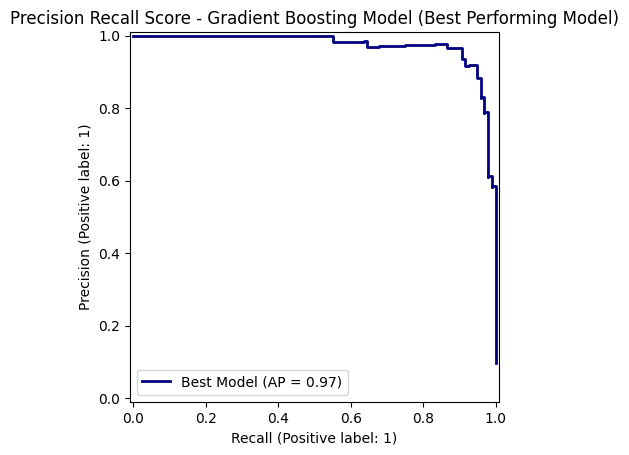

In [40]:
best_model_recall = recall_score(y_test, best_model_y_pred)
print(f"Recall Score: {best_model_recall:.3f}")

PrecisionRecallDisplay.from_predictions(y_test, best_model_y_prob, name = "Best Model", color = "navy", linewidth = 2)
plt.title("Precision Recall Score - Gradient Boosting Model (Best Performing Model)")
plt.show()

# Combining Model Evaluation Results from all Stages

In [41]:
models_results_df['Stage'] = '1 (Baseline)'
models_balanced_results_df['Stage'] = '2 (After_Balancing)'
best_models_tuned_df['Stage'] = '3 (After_Tuning)'

Comparison_cols = ['Model', 'F1-Score_1', 'ROC-AUC', 'Accuracy', 'Stage']
baseline_df = models_results_df[Comparison_cols]
balanced_df = models_balanced_results_df[Comparison_cols]
tuned_df = best_models_tuned_df[Comparison_cols]

combined_comparison_results = pd.concat([baseline_df, balanced_df, tuned_df], ignore_index = True)
combined_comparison_results = combined_comparison_results.sort_values(by = ['Stage', 'F1-Score_1'], ascending = [True, False])

best_F1_value = combined_comparison_results['F1-Score_1'].max()
best_ROC_AUC_value = combined_comparison_results['ROC-AUC'].max()
best_Accuracy_value = combined_comparison_results['Accuracy'].max()

combined_comparison_results

,Model,F1-Score_1,ROC-AUC,Accuracy,Stage
0,Random Forest,0.952381,0.998479,0.991,1 (Baseline)
1,Gradient Boosting,0.924623,0.998387,0.985,1 (Baseline)
2,Decision Tree,0.876847,0.953586,0.975,1 (Baseline)
3,Logistic Regression,0.738095,0.966215,0.956,1 (Baseline)
4,KNN,0.701987,0.927948,0.955,1 (Baseline)
5,Random Forest,0.952381,0.998479,0.991,2 (After_Balancing)
6,Gradient Boosting,0.890995,0.997269,0.977,2 (After_Balancing)
7,Decision Tree,0.876847,0.953586,0.975,2 (After_Balancing)
8,KNN,0.750000,0.970000,0.946,2 (After_Balancing)
9,Logistic Regression,0.738095,0.966215,0.956,2 (After_Balancing)


# Visualizing Combined Results for Comparison

## Comparing F1-Score

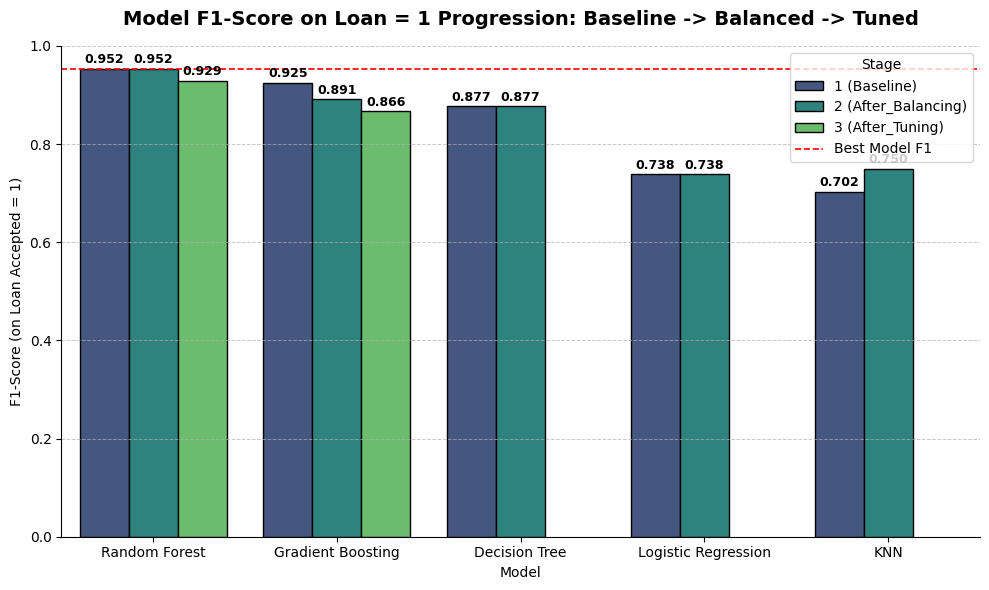

In [42]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = combined_comparison_results, x = 'Model', y = 'F1-Score_1', hue = 'Stage', palette = 'viridis', edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.3f', label_type = 'edge', fontsize = 9, padding = 2, color = 'black', weight = 'bold')

ax.yaxis.grid(True, linestyle = '--', linewidth = 0.7, alpha = 0.7)
ax.xaxis.grid(False)

plt.title("Model F1-Score on Loan = 1 Progression: Baseline -> Balanced -> Tuned", fontsize = 14, weight = 'bold', pad = 15)
plt.ylabel("F1-Score (on Loan Accepted = 1)")
plt.xlabel("Model")
plt.axhline(best_F1_value, color = 'red', linestyle = '--', linewidth = 1.2, label = 'Best Model F1')
plt.legend(title = 'Stage')
sns.despine()
plt.tight_layout()
plt.show()

## Comparing ROC-AUC Score

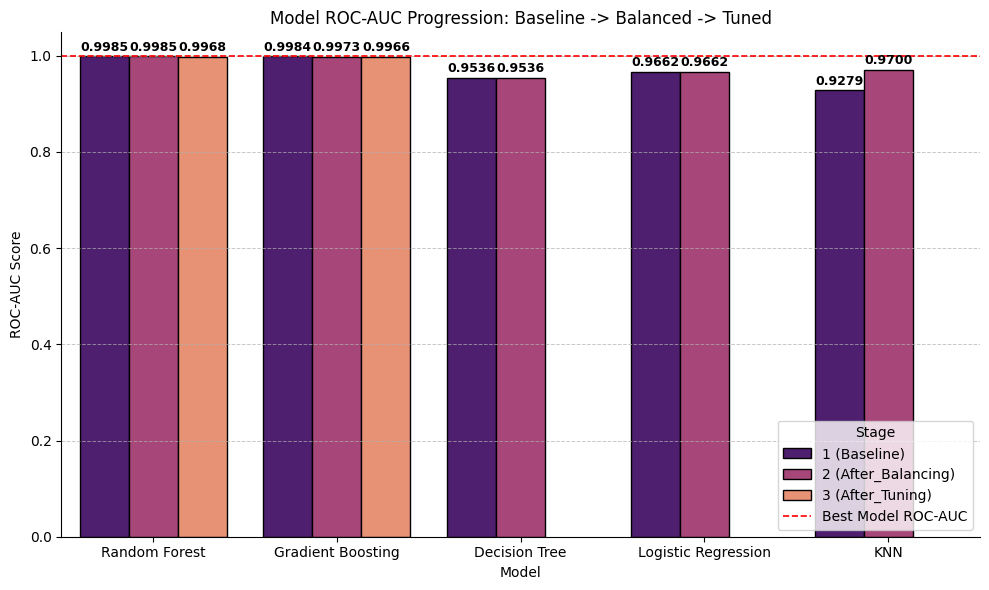

In [43]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = combined_comparison_results, x = 'Model', y = 'ROC-AUC', hue = 'Stage', palette = 'magma', edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.4f', label_type = 'edge', fontsize = 9, padding = 2, color = 'black', weight = 'bold')

ax.yaxis.grid(True, linestyle = '--', linewidth = 0.7, alpha = 0.7)
ax.xaxis.grid(False)

plt.title("Model ROC-AUC Progression: Baseline -> Balanced -> Tuned")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Model")
plt.axhline(best_ROC_AUC_value, color = 'red', linestyle = '--', linewidth = 1.2, label = 'Best Model ROC-AUC')
plt.legend(title = 'Stage')
sns.despine()
plt.tight_layout()
plt.show()

## Comparing Accuracy Score

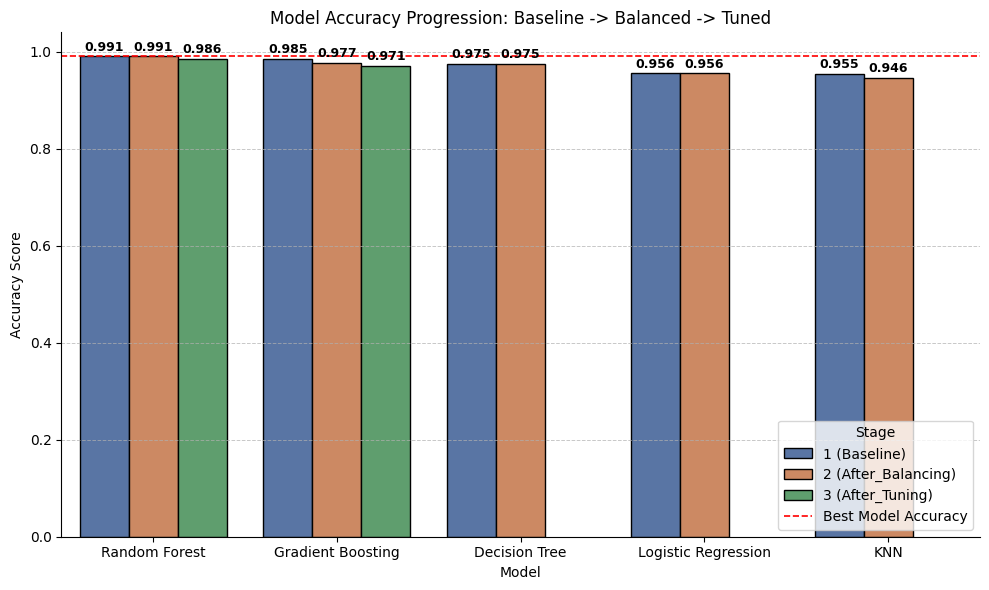

In [44]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = combined_comparison_results, x = 'Model', y = 'Accuracy', hue = 'Stage', palette = 'deep', edgecolor = 'black')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.3f', label_type = 'edge', fontsize = 9, padding = 2, color = 'black', weight = 'bold')

ax.yaxis.grid(True, linestyle = '--', linewidth = 0.7, alpha = 0.7)
ax.xaxis.grid(False)

plt.title("Model Accuracy Progression: Baseline -> Balanced -> Tuned")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.axhline(best_Accuracy_value, color = 'red', linestyle = '--', linewidth = 1.2, label = 'Best Model Accuracy')
plt.legend(title = 'Stage')
sns.despine()
plt.tight_layout()
plt.show()

# Interpretation of Models Performance

## Top Models Performance Overview

In [45]:
top_models_per_stage = (combined_comparison_results.groupby('Stage').first().reset_index()[['Stage', 'Model', 'F1-Score_1', 'ROC-AUC', 'Accuracy']])
top_models_per_stage.columns = ['Stage', 'Top Model', 'F1-Score (Loan Accepted = 1)', 'ROC-AUC', 'Accuracy']
top_models_per_stage[['F1-Score (Loan Accepted = 1)', 'ROC-AUC', 'Accuracy']] = top_models_per_stage[['F1-Score (Loan Accepted = 1)', 'ROC-AUC', 'Accuracy']].round(3)
top_models_per_stage['Stage'] = top_models_per_stage['Stage'].replace({'1 (Baseline)': 'Baseline', '2 (After_Balancing)': 'After_Balancing', '3 (After_Tuning)': 'After_Tuning'})
top_models_per_stage

,Stage,Top Model,F1-Score (Loan Accepted = 1),ROC-AUC,Accuracy
0,Baseline,Random Forest,0.952,0.998,0.991
1,After_Balancing,Random Forest,0.952,0.998,0.991
2,After_Tuning,Random Forest,0.929,0.997,0.986


## Model Evaluation Summary

The tree-based ensemble models - Random Forest and Gradient Boosting - continued to outperform all other algorithms acorss all stages (Baseline, After Balancing, and After Hyperparameter Tuning).

However, after model tuning and consistent validation, Random Forest emerged as the top performing model, delivering the highest overall F1-Score, ROC-AUC, and Accuracy with stable performances across all stages

## Final Recommendation

**Best Final Model:** Random Forest (After Tuning).

| Metric                       | Value        |
|:-----------------------------|:-------------|
| F1-Score (Loan Accepted = 1) | 0.929        |
| ROC-AUC                      | 0.997        |
| Accuracy                     | 0.986        |
| Stage                        | After Tuning |

## Key Observations

* Random Forest consistently maintained top performance across all stages; Baseline, Balanced, and Tuned, with minimal variance in metrics.
* It achieved superior Recall and Precision balance for both accepted (1) and non-accepted (0) classes.
* It showed strong generalization confirmed by 5-fold Cross Validation:
    - Mean F1-Score (Loan Accepted = 1): 0.888 ± 0.040
    - Mean ROC-AUC: 0.995 ± 0.003
    - *These low variance indicate stable and reliable model performance.*
* Feature importance analysis showed the model places the highest predictive weight on:
    - Income: 47%
    - Credit Card Average Spend (per month): 19%
    - Education (Undergrad: 12%
    - Mortgage: 3%
    - cd_accoun: 2%
    - Age: 2%
* The Confusion Matrix highlights very few misclassifications:
    - True Negatives (Will Not Accept): 985
    - True Positives (Will Accept): 91
    - False Negatives: 5
    - False Positives: 9
    - *This reflects high sensitivity (recall) and strong precision for both classes.*

## Runner-up: Gradient Boosting

Although Gradient Boosting remained competitive, its tuned version achieved:
* F1-Score: 0.866
* ROC-AUC: 0.997
* Accuracy: 0.971

While still robust, it underperformed Random Forest in both F1 and overall prediction stability.

## Business Interpretation

A Random Forest Classifier offers a  highly dependable method for forecasting loan acceptance behavior among potential customers.
This model allows the business to:
* **Target the right customers:** identify individuals with the highest likelihood of accepting personal loan offers.
* **Enhance marketing efficiency:** Reduce campaign costs by focusing on receptive customer profiles.
* **Optimize resource allocation:** Prioritize outreach to segments showing strong acceptance intent.
* **Interpret drivers of acceptance:** Understand that income level, spending behavior (cc_avg), and education level are strong indicators of loan acceptance.

# Conclusion

**Final Chosen Model:** Random Forest (After Tuning)

**Reason:** Best combination of accuracy, recall, interpretability, and stability across all evaluation stages

The Random Forest model provides teh most reliable and generalizable performance for implementation in the Loan Acceptance Prediction System, ensuring both predictive strength and actionable business insights.

# Saving Final Model

In [46]:
with open("Personal_loan_acceptance_Prediction_Model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [47]:
with open("Model_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)